(3542, 2479)

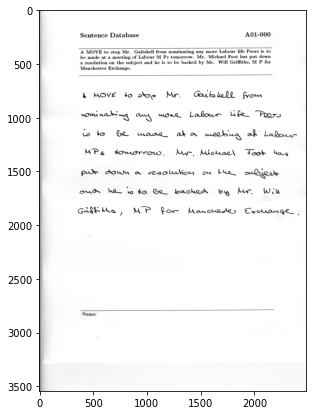

In [ ]:
from google.colab.patches import cv2_imshow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Read the image and be sure it is grayscale
#im_path = 'j01-042.png'
im_path = 'a01-000u.png'
im = io.imread(im_path)
im = rgb2gray(im)

# Ensure the image is a float in the range [0-1]
im = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(im, cmap='gray')

im.shape


In [ ]:

def create_gaussian_filter(sigma):
    
    # How to choose size n
    n = 2*math.floor(sigma*3)+1
    # Precompute sigma*sigma
    sigma2 = sigma*sigma
    
    # Create a coordinate sampling from -n/2 to n/2 so that (0,0) will be at the center of the filter
    x = np.linspace(-n/2.0, n/2.0, n)
    y = np.linspace(-n/2.0, n/2.0, n)
    
    # Blank array for the Gaussian filter
    gaussian_filter = np.zeros((n,n))

    # Loop over all elements of the filter
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            
            # Use the x and y coordinate sampling as the inputs to the 2D Gaussian function
            gaussian_filter[i,j] = (1/(2*math.pi*sigma2))*math.exp(-(x[i]*x[i]+y[j]*y[j])/(2*sigma2))
      
    # Normalize so the filter sums to 1
    return gaussian_filter/np.sum(gaussian_filter.flatten())

def convolution(filter, image):
    m, n = filter.shape
    # Pad with zeros on all sides. Pad size depends on how much extra rows and columns the filter needs when placed on the image at each corner

    # Flip the filter and apply correlation
    f2 = np.zeros((m, n))
    for i in range(m):
      for j in range(n):
        f2[m - i - 1][n - j - 1] = filter[i][j]

    filter = f2.copy()

    image = np.pad(image, ((int((m-1)/2), int((m-1)/2)), (int((n-1)/2), int((n-1)/2))), 'constant')
    print(image.shape)
    height, width = image.shape
    height = height - m + 1
    width = width - n + 1

    output = np.zeros((height, width))
    for i in range(height):
      for j in range(width):
        temp = image[i:i+m, j:j+n] * filter

        output[i][j] = np.sum(temp)
        
    return output

In [ ]:
# Resize the image from (3542, 2479) to (1200, 839)
from PIL import Image

baseheight = 1200
#img = Image.open('j01-042.png')
img = Image.open('a01-000u.png')

hpercent = (baseheight / float(img.size[1]))
wsize = int((float(img.size[0]) * float(hpercent)))
img = img.resize((wsize, baseheight), Image.ANTIALIAS)
img.save('resized_image.jpg')

In [ ]:

im2arr = np.array(img)
arr2im = Image.fromarray(im2arr)

In [ ]:
im2arr.shape

(1200, 839)

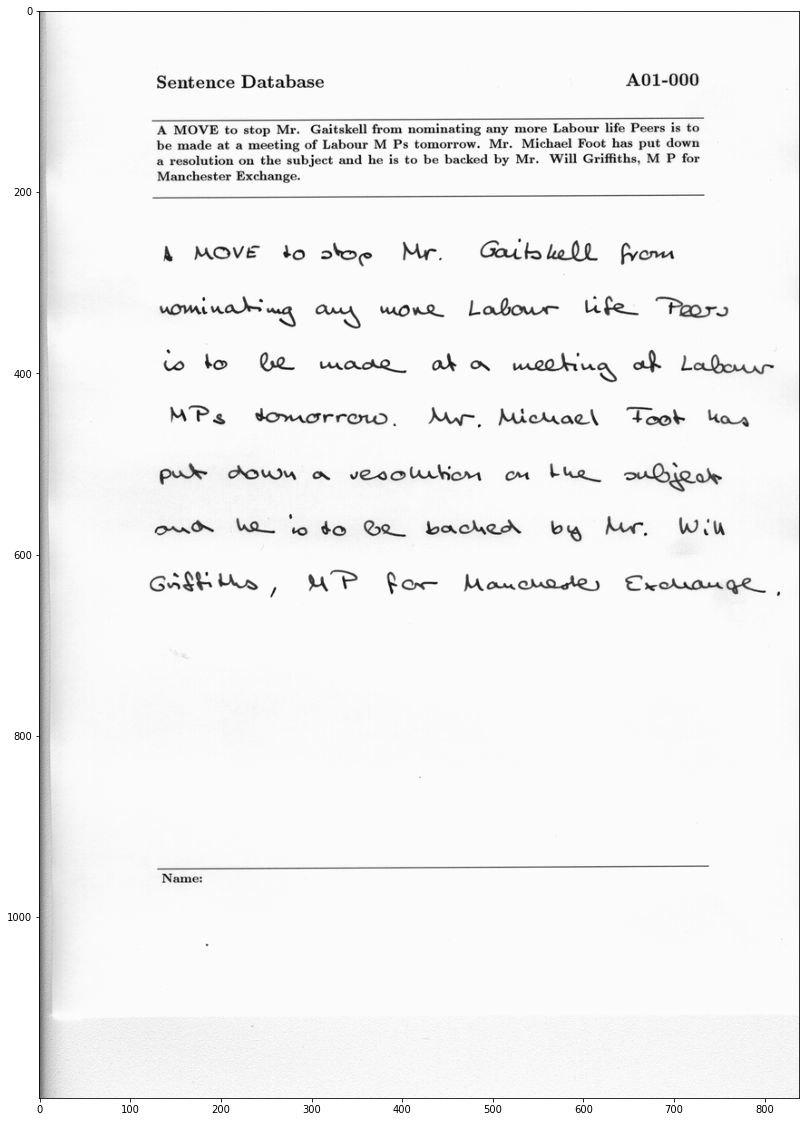

In [ ]:
# Show the image
fig2 = plt.figure(figsize = (20,20))
plt.imshow(im2arr, cmap='gray')

(1206, 845)


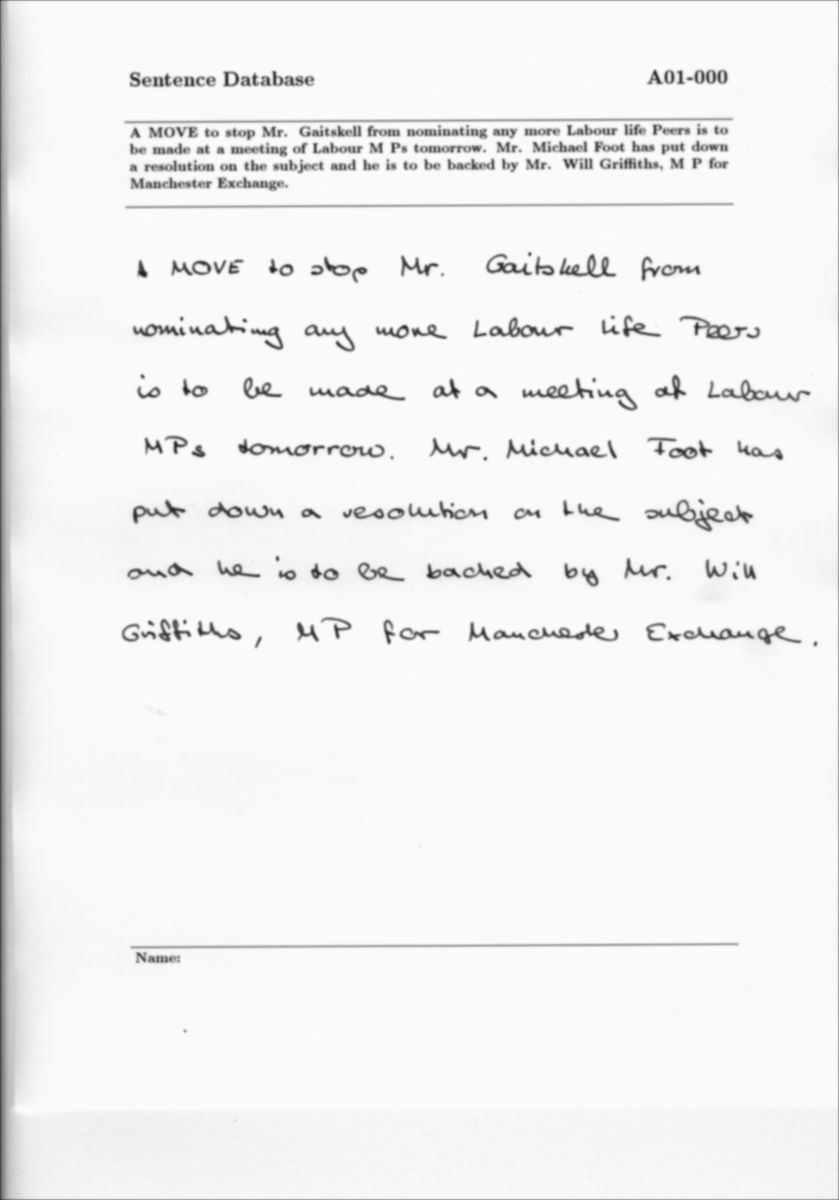

In [ ]:
# Gaussian blur
temp = convolution(create_gaussian_filter(1.2), im2arr)
#blur = cv2.blur(im2arr,create_gaussian_filter(1.2))
cv2_imshow(temp)

(1202, 839)
(1200, 841)


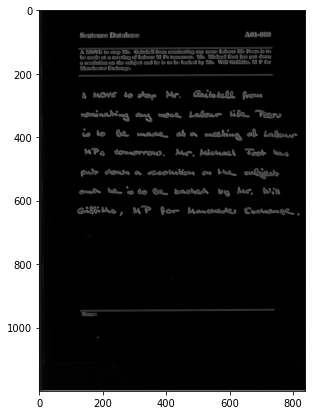

In [ ]:
# Derivative with respect to x

#derivativeFilterX = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
#temp = thresh
derivativeFilterX = np.array([-1, 0, 1])
derivativeFilterX = derivativeFilterX.reshape(3,1)
#x_derivative_im = convolution(derivativeFilterX, cameraman_im_arr)
x_derivative_im = convolution(derivativeFilterX, temp)

# Show the image
#fig3 = plt.figure(figsize = (7,7))
#plt.imshow(x_derivative_im, cmap='gray')

# Derivative with respect to y

#derivativeFilterY = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
derivativeFilterY = np.array([-1, 0, 1])

derivativeFilterY = derivativeFilterY.reshape(1,3)

#y_derivative_im = convolution(derivativeFilterY, cameraman_im_arr)
y_derivative_im = convolution(derivativeFilterY, temp)

# Show the image
#fig4 = plt.figure(figsize = (7,7))
#plt.imshow(y_derivative_im, cmap='gray')

full_der_im = x_derivative_im * x_derivative_im + y_derivative_im * y_derivative_im
full_der_im = np.sqrt(full_der_im)

# Show the image
fig5 = plt.figure(figsize = (7,7))
plt.imshow(full_der_im, cmap='gray')

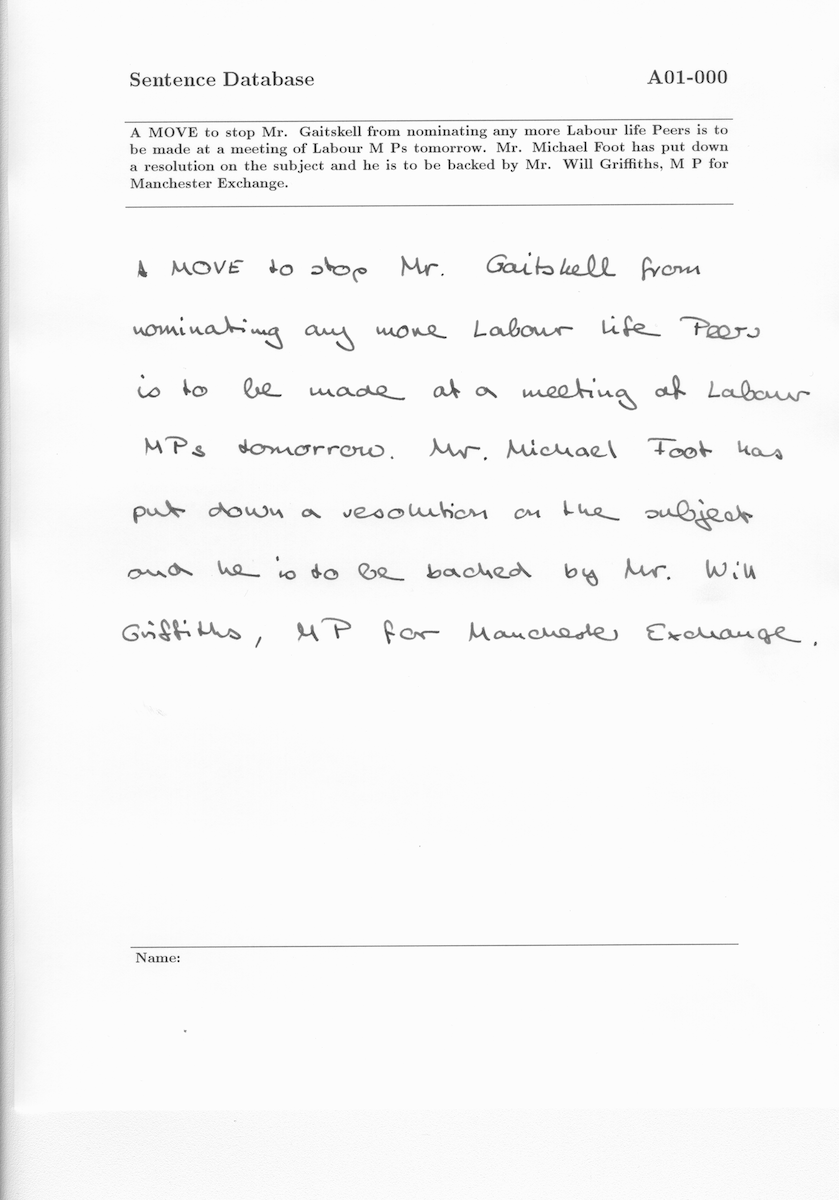

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)


gamma = 2                                   # change the value here to get different result
adjusted = adjust_gamma(im2arr, gamma=gamma)
#cv2.putText(adjusted, "g={}".format(gamma), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
cv2_imshow(adjusted)

cv2.waitKey(0)

(1202, 841)


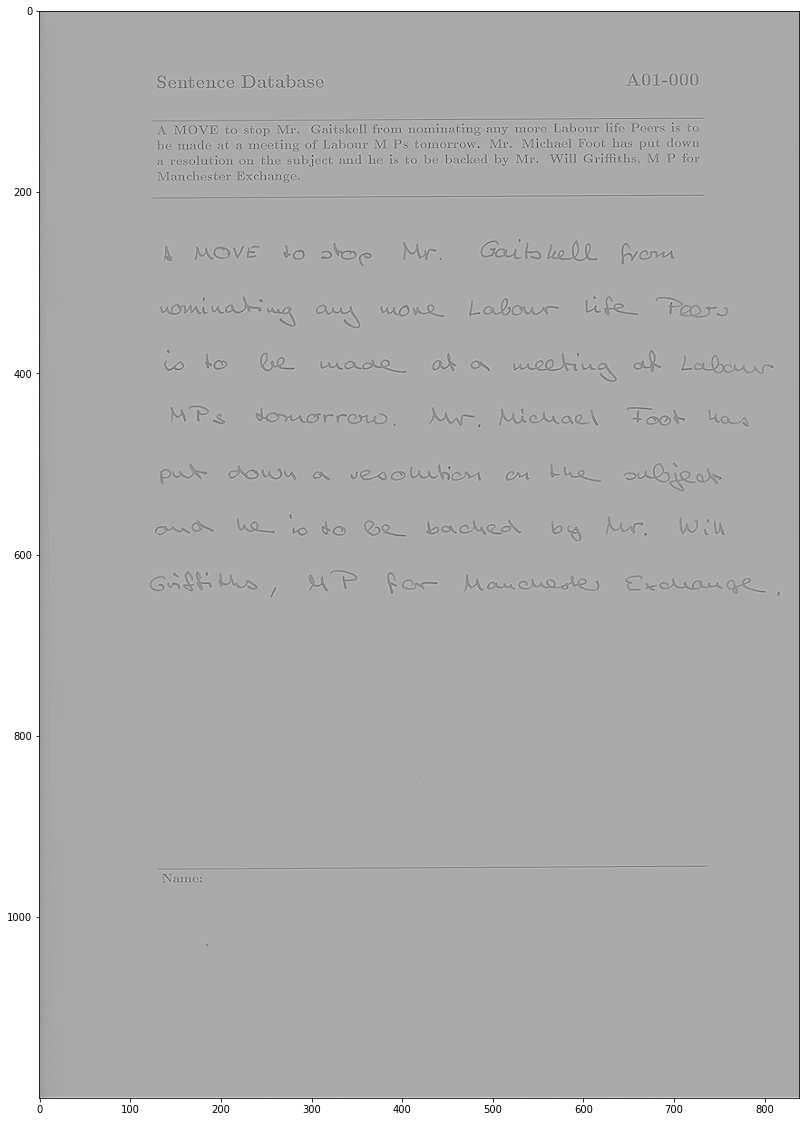

In [ ]:
# Image sharpening
laplacian_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharp = convolution(laplacian_filter, adjusted)

# Show the image
fig2 = plt.figure(figsize = (20,20))
plt.imshow(sharp, cmap='gray')

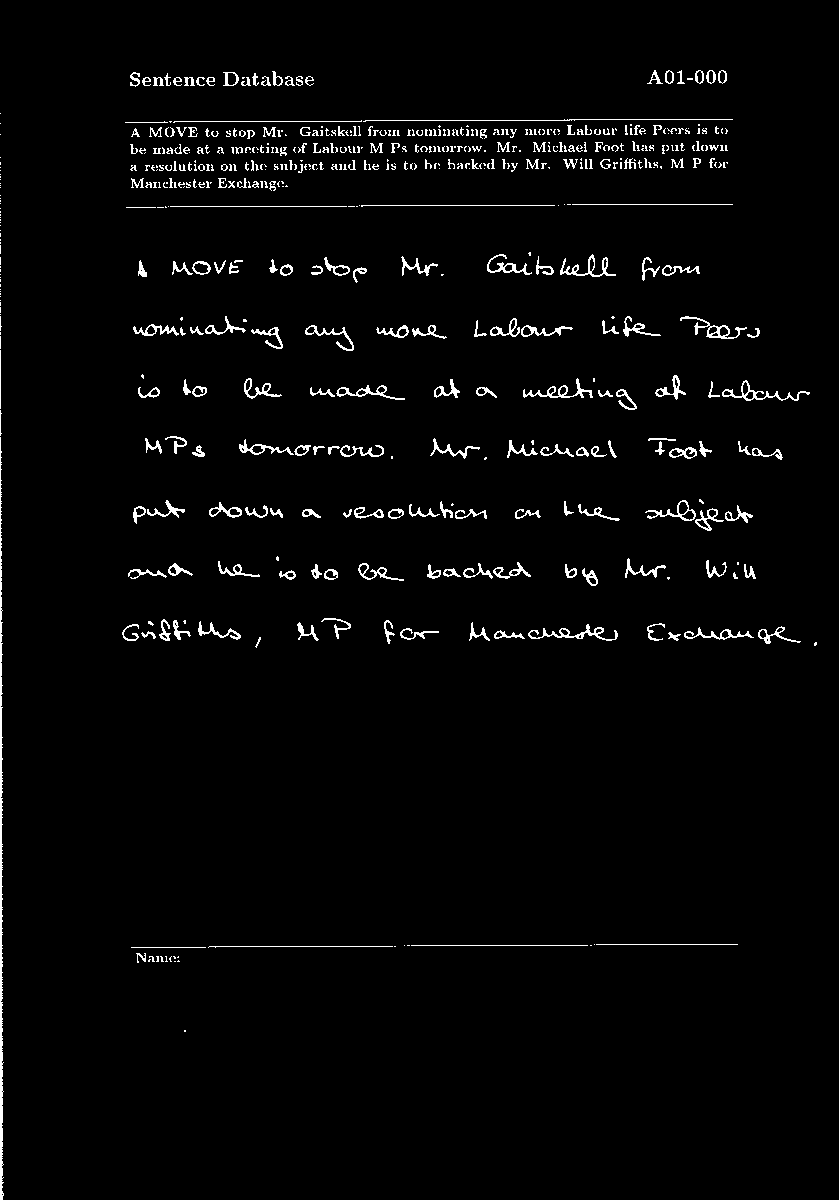

-1

In [ ]:
# Thresholding
sharp = im2arr
ret,thresh = cv2.threshold(sharp,127,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)
cv2.waitKey(0)


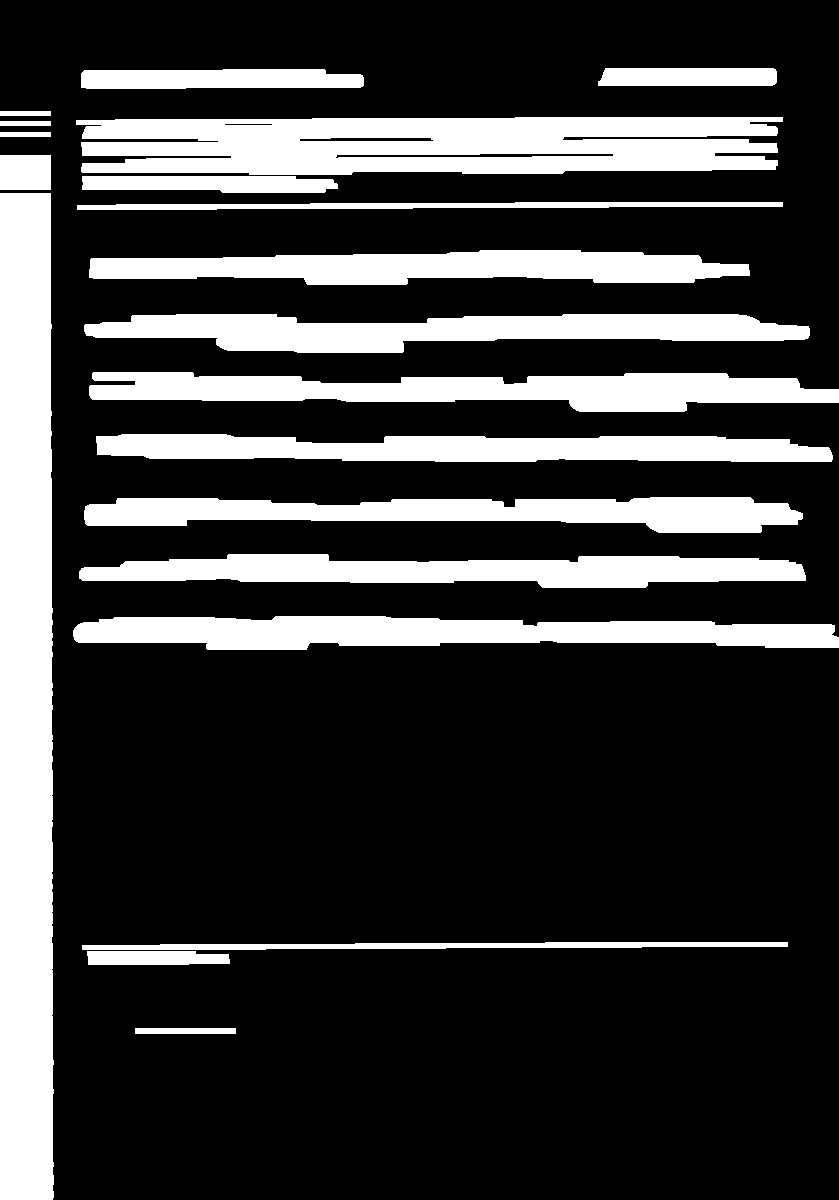

-1

In [ ]:
# Dilation

kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2_imshow(img_dilation)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np
image = cv2.imread('resized_image.jpg')

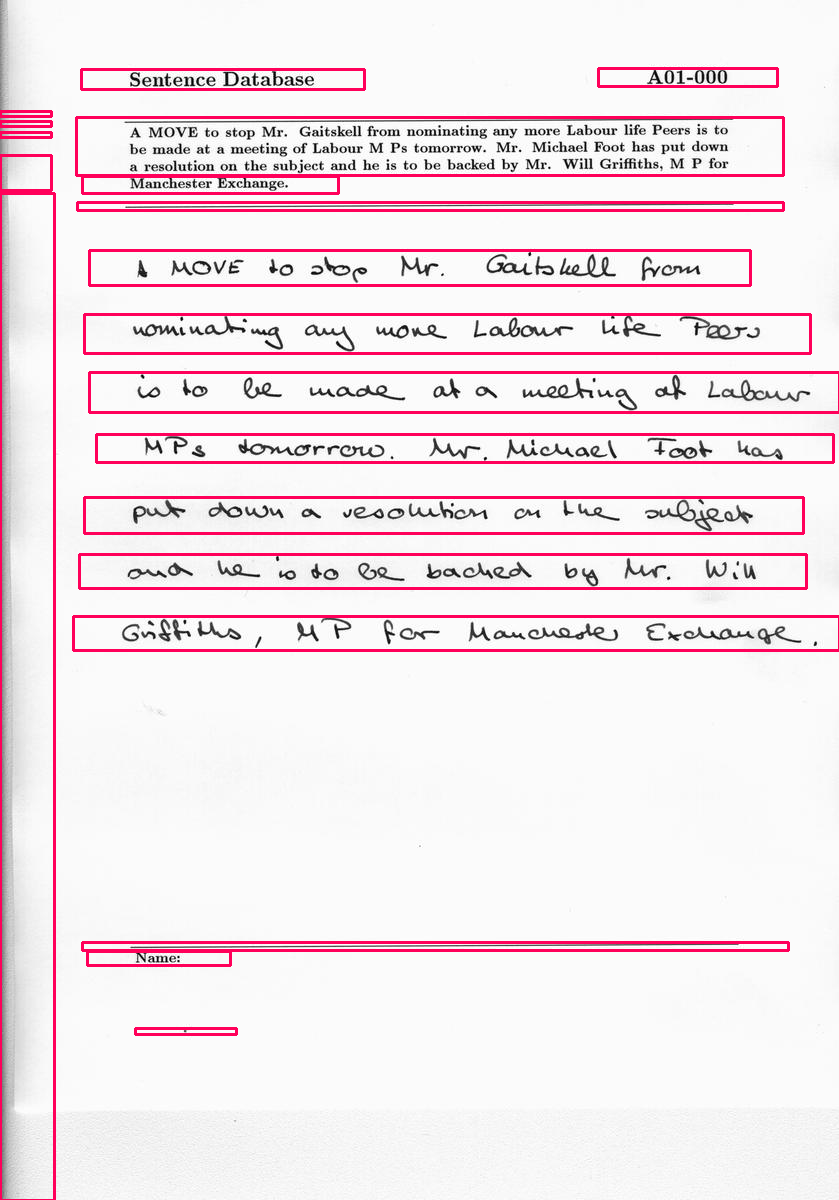

-1

In [ ]:
# Image segmentation

im_dil = img_dilation.astype(np.uint8)
#im_dil = img_dilation.copy()
ctrs, hier = cv2.findContours(im_dil.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)

    roi = image[y:y+h, x:x+w]
    cv2.imwrite("segment_no_"+str(i)+".png",roi)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.waitKey(0)

cv2.imwrite('final_bounded_box_image.png',image)
cv2_imshow(image)
cv2.waitKey(0)